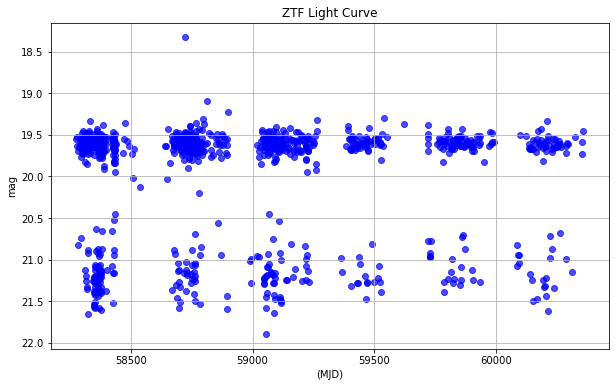

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('updated_blazar_data.csv')

# Extract R magnitude and MJD columns
r_mag = data['mag']
mjd = data['mjd']

# Plot the light curve
plt.figure(figsize=(10, 6))
plt.scatter(mjd, r_mag, marker='o', color='blue', alpha=0.7)
plt.title('ZTF Light Curve')
plt.xlabel('(MJD)')
plt.ylabel('mag')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis for magnitudes

plt.savefig('output_graph.png', format='png')  # Save the plot as a PNG file
plt.show() 

In [10]:
import pandas as pd
files = ['gm440.csv','gmag440.csv' ]
df = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df = pd.concat([df, data], axis=0)
df.to_csv('merged_files.csv', index=False)


In [145]:
import csv
import numpy as np

def fractional_variability(mag, magerr):
    mag = np.array(mag)
    magerr = np.array(magerr)
    mean_mag = np.mean(mag)
    variability = np.sqrt(np.sum((magerr**2 + (mag - mean_mag)**2)) / (len(mag) * mean_mag**2))
    return variability

def read_csv(filename): 
    mag = []
    magerr = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            mag.append(float(row[4]))
            magerr.append(float(row[5]))
    return mag, magerr

def main(): 
    filename = 'updated_blazar_data.csv'  
    mag, magerr = read_csv(filename)
    variability = fractional_variability(mag, magerr)
    print("Fractional Variability:", variability)

if __name__ == "__main__":
    main()

Fractional Variability: 0.002619808492254024


In [143]:
import csv
import numpy as np

def read_csv(filename):
    mag = []
    magerr = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            mag.append(float(row[4]))
            magerr.append(float(row[5]))
    return mag, magerr

def excess_variance(mag, magerr):
    mag = np.array(mag)
    magerr = np.array(magerr)
    variance = np.var(mag) - np.mean(magerr)**2
    return variance

def main():
    filename = 'updated_blazar_data.csv'
    mag, magerr = read_csv(filename)
    mean_var = excess_variance(mag, magerr)
    print("Excess Variance in Mag:", mean_var)

if __name__ == "__main__":
    main()

Excess Variance in Mag: 0.0005742790521749812


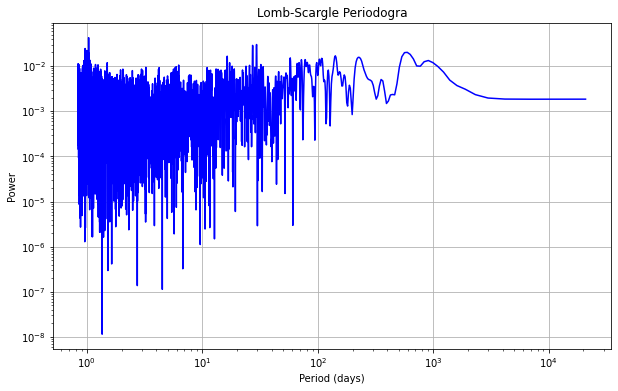

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

def plot_lomb_scargle_periodogram(time, flux):
    frequency, power = LombScargle(time, flux).autopower()

    # Convert frequency to period in days
    period = 1. / frequency

    # Plot Lomb-Scargle Periodogram
    plt.figure(figsize=(10, 6))
    plt.plot(period, power, color='blue')
    plt.xlabel('Period (days)')
    plt.ylabel('Power')
    plt.title('Lomb-Scargle Periodogra')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

# Load blazar data from CSV file
data = pd.read_csv("updated_blazar_data.csv")
time = data['mjd']  
flux = data['flux'] 

# Plot Lomb-Scargle Periodogram
plot_lomb_scargle_periodogram(time, flux)


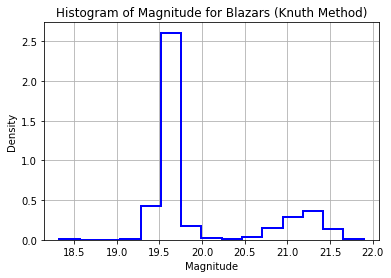

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def knuth_bin_width(data):
    """
    Calculate optimal histogram bin width using Knuth's rule.
    """
    n = len(data)
    std_dev = np.std(data)
    bin_width = 3.5 * std_dev / (n**(1/3))
    return bin_width

#  data from CSV file
data = pd.read_csv("updated_blazar_data.csv")

# Extract magnitude data
magnitude_data = data['mag']


bin_width = knuth_bin_width(magnitude_data)

# Determine number of bins
bin_count = int((max(magnitude_data) - min(magnitude_data)) / bin_width)


plt.hist(magnitude_data, bins=bin_count, histtype='step', color='blue', linewidth=2, density=True)

# Add labels and title
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.title('Histogram of Magnitude for Blazars (Knuth Method)')
plt.grid(True)

# Show plot
plt.show()


In [139]:
import pandas as pd
import numpy as np

data = pd.read_csv('updated_blazar_data.csv') 

def amplitude_variability_percentage(mag, magerr):
    mag_max = data['mag'].max()
    mag_min = data['mag'].min()
    mean_magerr = np.mean(data['magerr'])
    
    amplitude_variability_percent = 100 * np.sqrt(np.sum((mag_max - mag_min)**2 - 2 * (mean_magerr)**2))
    
    print("Amplitude Variability Percentage: {:.2f}%".format(amplitude_variability_percent))

# Call the function with the 'mag' and 'magerr' columns from your DataFrame 
amplitude_variability_percentage(data['mag'], data['magerr'])


Amplitude Variability Percentage: 41.05%


In [20]:
import pandas as pd
import numpy as np

def calculate_blazar_size(data, c, dt):
    # Sort the data by MJD (assuming MJD is the first column and magnitude is the second column)
    sorted_data = data.sort_values(by='mjd')

    # Calculate time difference between consecutive observations
    sorted_data['TimeDiff'] = sorted_data['mjd'].diff()

    # Calculate apparent velocity of the blazar (delta_magnitude / delta_time)
    sorted_data['ApparentVelocity'] = (sorted_data['mag'].diff() / sorted_data['TimeDiff']) * c

    # Calculate apparent size of the blazar (size = velocity * time)
    sorted_data['ApparentSize'] = sorted_data['ApparentVelocity'] * dt

    # Total size of the blazar
    total_size = sorted_data['ApparentSize'].sum()

    return total_size

def main():
    # Load data from CSV file
    filename = 'updated_blazar_data.csv'
    data = pd.read_csv(filename)

    # Constants
    c = 299792.458  # Speed of light in km/s
    dt = 1  # Time interval in seconds

    # Calculate blazar size
    blazar_size = calculate_blazar_size(data, c, dt)

    print("Total size of the blazar:", blazar_size, "square kilometers")

if __name__ == "__main__":
    main()


Total size of the blazar: -150248716.0092683 square kilometers


In [22]:
import csv
from datetime import datetime

def read_data(file_path):
    mjd = []
    magnitude = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header if present
        for row in reader:
            mjd.append(float(row[4]))
            magnitude.append(float(row[5]))
    return mjd, magnitude

def calculate_dt(mjd):
    start_date = datetime.fromordinal(int(min(mjd)))  # Convert the first MJD to datetime
    end_date = datetime.fromordinal(int(max(mjd)))    # Convert the last MJD to datetime
    dt = (end_date - start_date).days                 # Calculate the time difference in days
    return dt

def calculate_dm(magnitude):
    dm = max(magnitude) - min(magnitude)
    return dm

def calculate_blazar_size(c, dt, dm):
    blazar_size = c * dt * dm
    return blazar_size

def main():
    file_path = 'updated_blazar_data.csv'  # Update with the path to your CSV file
    c = 1  # Some constant (you can adjust this as needed)
    mjd, magnitude = read_data(file_path)
    dt = calculate_dt(mjd)
    dm = calculate_dm(magnitude)
    blazar_size = calculate_blazar_size(c, dt, dm)
    print("Blazar Size:", blazar_size)

if __name__ == "__main__":
    main()


Blazar Size: 0.09832612059999998


In [26]:
import numpy as np
import pandas as pd

def calculate_blazar_size(mjd, magnitude):
    # Calculate the time span (in days)
    time_span_days = max(mjd) - min(mjd)

    # Calculate the magnitude span
    magnitude_span = max(magnitude) - min(magnitude)

    return time_span_days, magnitude_span

# Load blazar data from CSV file
data = pd.read_csv("updated_blazar_data.csv")
mjd = data['mjd']
magnitude = data['mag']

# Calculate blazar size
time_span, magnitude_span = calculate_blazar_size(mjd, magnitude)

print("Blazar size (Time span in days):", time_span)
print("Blazar size (Magnitude span):", magnitude_span)


Blazar size (Time span in days): 2032.3301620000057
Blazar size (Magnitude span): 2.3611641


In [11]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv("merged_files.csv") 

# Convert magnitude to flux
data['flux'] = 10**(-0.4 * data['mag']) 

# Save updated CSV file
data.to_csv("updated_blazar_data.csv", index=False)
